<a href="https://colab.research.google.com/github/rk2026/civil/blob/main/updateRasteBasedOnAnother.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install if needed
!pip install rasterio

#Import necessary library
**import rasterio**: Imports the Rasterio library for reading, writing, and manipulating raster datasets.

**from rasterio.mask import mask**: Imports the mask function for masking raster data.

**import numpy as np**: Imports NumPy, used here for array manipulations.

**from google.colab import files**: Imports tools to download files in Google Colab.

**import rasterio.plot as rio_plot**: Imports plotting utilities from Rasterio with an alias.

**import matplotlib.pyplot** as plt: Imports Matplotlib's plotting module.

In [26]:
import rasterio
from rasterio.mask import mask
import numpy as np
from google.colab import files
import rasterio.plot as rio_plot
import matplotlib.pyplot as plt

Defines the file paths for the input surface_raster and DEM files, as well as the output file for the updated DEM.

In [27]:
# Define input raster paths
surface_path = '/content/n27_e085_1arc_v3_aoi_surface.tif'
dem_path = '/content/n27_e085_1arc_v3_aoi.tif'
output_path = '/content/updated_dem.tif'

Read the data from its source

In [28]:
# Read input rasters
try:
    with rasterio.open(surface_path) as src:
        surface_array = src.read(1)
        surface_profile = src.profile

    with rasterio.open(dem_path) as src:
        dem_array = src.read(1)
        dem_profile = src.profile

except rasterio.RasterioIOError as e:
    print(f"Error opening input rasters: {e}")
    exit()

In [42]:
!pip install plotly

In [29]:
# Check if resampling is necessary (same spatial extent and resolution)
if surface_profile['crs'] != dem_profile['crs'] or surface_profile['transform'] != dem_profile['transform']:
    # Resample surface array to match DEM profile
    from rasterio.warp import reproject, Resampling

    surface_array_resampled = np.empty(dem_array.shape, dtype=surface_array.dtype)
    reproject(
        source=surface_array,
        destination=surface_array_resampled,
        src_transform=surface_profile['transform'],
        src_crs=surface_profile['crs'],
        dst_transform=dem_profile['transform'],
        dst_crs=dem_profile['crs'],
        resampling=Resampling.nearest  # Choose an appropriate resampling method
    )
else:
    surface_array_resampled = surface_array.copy()  # No resampling needed

# Update DEM values based on surface data

In [30]:
dem_array[surface_array_resampled != surface_profile['nodata']] = surface_array_resampled[surface_array_resampled != surface_profile['nodata']]

In [31]:
# Write the updated DEM to a new file
with rasterio.open(output_path, 'w', **dem_profile) as dst:
    dst.write(dem_array, 1)

In [43]:
# prompt: "# Display and download the updated DEM
# try:
#     with rasterio.open(output_path) as src:
#         updated_dem = src.read(1)
#         rio_plot.show(updated_dem)
#         plt.show()
# except rasterio.RasterioIOError as e:
#     print(f"Error opening or reading updated_dem.tif: {e}")" create interactive 3d view

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Assuming output_path from the previous code is defined and the updated DEM is written there

try:
    with rasterio.open(output_path) as src:
        updated_dem = src.read(1)

        # Function to display the DEM at a given band (only one band here)
        def display_dem(band=1):
            show(updated_dem, cmap='terrain', title=f'Updated DEM')
            plt.show()

        interact(display_dem, band=fixed(1)); # fixed(1) since it's a single band

except rasterio.RasterioIOError as e:
    print(f"Error opening or reading updated_dem.tif: {e}")

# For an actual 3D view, you'd need a more advanced library like Plotly or Mayavi
# Example using Plotly (requires installation: !pip install plotly)

try:
    import plotly.graph_objects as go

    fig = go.Figure(data=[go.Surface(z=updated_dem)])
    fig.update_layout(title='3D DEM Visualization', autosize=True,
                      width=800, height=800,
                      margin=dict(l=65, r=50, b=65, t=90))
    fig.show()

except ImportError:
    print("Plotly is not installed.  Install it with '!pip install plotly'")
    print("Interactive 3D visualization is not available.")

# Download the updated DEM (code from the original provided)
try:
    files.download(output_path)
except Exception as e:
    print(f"Error downloading file: {e}")

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Display the updated Raster DEM

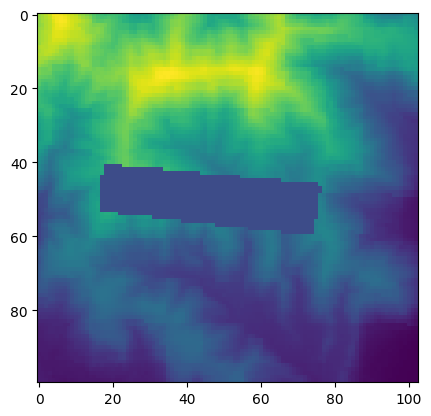

In [32]:
# Display and download the updated DEM
try:
    with rasterio.open(output_path) as src:
        updated_dem = src.read(1)
        rio_plot.show(updated_dem)
        plt.show()
except rasterio.RasterioIOError as e:
    print(f"Error opening or reading updated_dem.tif: {e}")

Downnload raster updated file

In [33]:
files.download(output_path)  # Download the file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>